In [29]:
import pandas as pd

In [30]:
sd = pd.read_csv("student_data.csv")
sd

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Find correlations between various features and grade_mean and see which features have a significant impact on it.

In [31]:
sd['grade_mean'] = sd[['G1', 'G2', 'G3']].mean(axis=1)

features = sd.drop(columns=['G1', 'G2', 'G3', 'grade_mean'])

correlation_matrix = features.corrwith(sd['grade_mean'],numeric_only=True)

sorted_corr = correlation_matrix.abs().sort_values(ascending=False)
sorted_corr

failures      0.375759
Medu          0.224260
Fedu          0.175852
goout         0.154511
age           0.134589
studytime     0.134565
traveltime    0.128197
Walc          0.088025
health        0.080380
Dalc          0.072508
famrel        0.021653
absences      0.005909
freetime      0.003773
dtype: float64

### Find out who got better grades (Boys or Girls). Similarly Find out who got better grades age wise.

In [32]:
sd_by_sex = sd.groupby(by=['sex'])["grade_mean"].mean().sort_values(ascending=False)
sd_by_sex

sex
M    11.073084
F    10.325321
Name: grade_mean, dtype: float64

In [33]:
sd_by_age = sd.groupby(by=['age'])["grade_mean"].mean().sort_values(ascending=False)
sd_by_age

age
20    13.777778
15    11.284553
16    11.051282
17    10.551020
18    10.134146
19     9.236111
21     8.333333
22     7.333333
Name: grade_mean, dtype: float64

### Count the number of distinct values in each column and drop column with very high distinct values.

In [34]:
sd.nunique().sort_values(ascending=False)

grade_mean    54
absences      34
G3            18
G2            17
G1            17
age            8
freetime       5
goout          5
Dalc           5
Walc           5
health         5
famrel         5
Fjob           5
Mjob           5
Fedu           5
Medu           5
traveltime     4
studytime      4
failures       4
reason         4
guardian       3
romantic       2
school         2
internet       2
higher         2
nursery        2
activities     2
sex            2
famsup         2
schoolsup      2
Pstatus        2
famsize        2
address        2
paid           2
dtype: int64

In [35]:
sd = sd.drop(columns="absences")
sd

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,grade_mean
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,9,9,9,9.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,14,16,16,15.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,10,8,7,8.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,11,12,10,11.000000


### Lable encode all other columns.

In [36]:
from sklearn.preprocessing import LabelEncoder
non_grade_columns = sd.drop(columns=['G1', 'G2', 'G3'])
encoded_sd = sd.copy()

for col in non_grade_columns:
    encoded_sd[col] = LabelEncoder().fit_transform(encoded_sd[col])

encoded_sd

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,grade_mean
0,0,0,3,1,0,0,4,4,0,4,...,3,2,3,0,0,2,5,6,6,13
1,0,0,2,1,0,1,1,1,0,2,...,4,2,2,0,0,2,5,5,6,12
2,0,0,0,1,1,1,1,1,0,2,...,3,2,1,1,2,2,7,8,10,21
3,0,0,0,1,0,1,4,2,1,3,...,2,1,1,0,0,4,15,14,15,40
4,0,0,1,1,0,1,3,3,2,2,...,3,2,1,0,1,4,6,10,10,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,5,1,1,0,2,2,3,3,...,4,4,3,3,4,3,9,9,9,23
391,1,1,2,1,1,1,3,1,3,3,...,1,3,4,2,3,1,14,16,16,42
392,1,1,6,0,0,1,1,1,2,2,...,4,4,2,2,2,2,10,8,7,21
393,1,1,3,0,1,1,3,2,3,2,...,3,3,0,2,3,4,11,12,10,29


### Plot Graph of Mean vs top 4 correlated attributes in single plot using subplots.

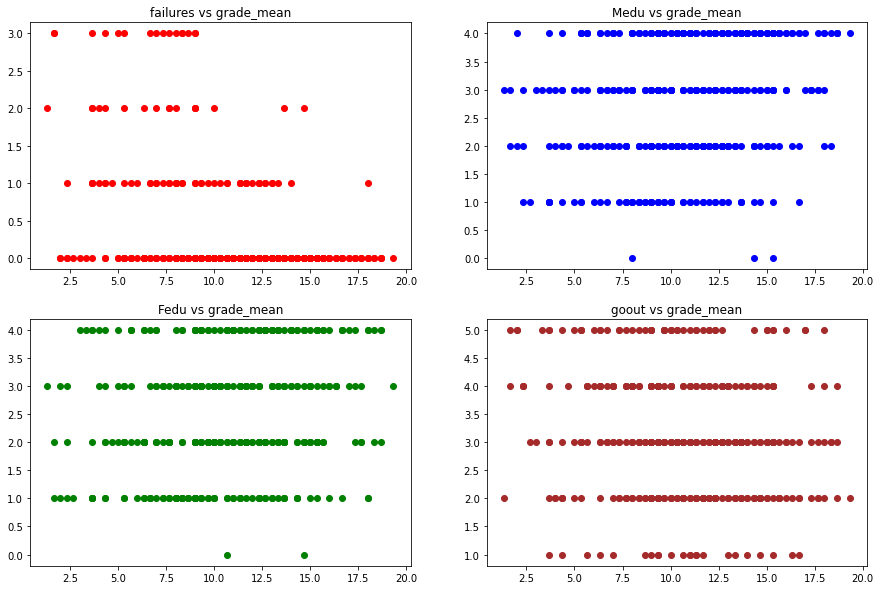

In [37]:
import matplotlib.pyplot as plt

colors = ["red","blue","green","brown"]

fig = plt.figure(1,figsize=[15,10])
for i, col_val in enumerate(sorted_corr.index[:4].tolist()):
    plt.subplot(2,2,i+1)
    plt.scatter(sd.loc[:, "grade_mean"], sd.loc[:, col_val],c=colors[i])
    plt.title(f"{col_val} vs grade_mean")


plt.show()

### Apply Apriori algorithm to find top 10 most significant rules for Grade mean.

In [38]:
from pyECLAT import ECLAT
sd.columns = [i for i in range(len(sd.columns))]
sd = sd.astype(str)
my_eclat = ECLAT(data=sd, verbose=True)



100%|██████████| 99/99 [00:00<00:00, 1707.02it/s]


In [39]:
rule_indices, rule_supports = my_eclat.fit(min_support=0.725,
                                           min_combination=5,
                                           max_combination=5)
rule_supports

Combination 5 by 5


252it [00:03, 63.65it/s]


{'2 & 3 & no & 1 & yes': 0.7670886075949367,
 '2 & no & 1 & T & yes': 0.7772151898734178,
 '2 & no & 1 & GP & yes': 0.7620253164556962,
 '2 & no & 1 & 4 & yes': 0.7493670886075949,
 '3 & no & 1 & T & yes': 0.7645569620253164,
 '3 & no & 1 & GP & yes': 0.7493670886075949,
 '3 & no & 1 & 4 & yes': 0.7341772151898734,
 'no & 1 & T & GP & yes': 0.7569620253164557,
 'no & 1 & T & 4 & yes': 0.7468354430379747,
 'no & 1 & GP & 4 & yes': 0.7518987341772152}

In [40]:
rule_indices, rule_supports = my_eclat.fit(min_support=0.555,
                                           min_combination=7,
                                           max_combination=7)
rule_supports

Combination 7 by 7


3432it [00:56, 60.82it/s]


{'2 & 3 & no & 1 & T & GP & yes': 0.5949367088607594,
 '2 & 3 & no & 1 & T & 4 & yes': 0.5848101265822785,
 '2 & 3 & no & 1 & T & 0 & yes': 0.569620253164557,
 '2 & 3 & no & 1 & GP & 4 & yes': 0.5746835443037974,
 '2 & no & 1 & T & GP & 4 & yes': 0.5949367088607594,
 '2 & no & 1 & T & GP & 0 & yes': 0.569620253164557,
 '2 & no & 1 & T & 4 & 0 & yes': 0.5594936708860759,
 '2 & no & 1 & GP & 4 & 0 & yes': 0.5569620253164557,
 '3 & no & 1 & T & GP & 4 & yes': 0.5772151898734177,
 '3 & no & 1 & T & GP & 0 & yes': 0.5594936708860759,
 'no & 1 & T & GP & 4 & 0 & yes': 0.5645569620253165}